In [10]:
from gensim.models import Word2Vec
import os 
from sklearn.decomposition import PCA
import re
from pprint import pprint

import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
from wxconv import WXC


In [11]:

input_path='/home/turning/Documents/GitHub/CL_project/CL_PROJECT_CODE/Teamwise_dataset/'
list_files=[]
for x in os.listdir(input_path):
    if x.endswith(".txt"):
        list_files.append(input_path+x)


corpus=""
cleaned_corpus=""
for file_path in list_files:
	f=open(file_path,'r')
	corpus+=f.read()

corpus = re.sub('▁-', " " , corpus)
corpus = re.sub('[A-Za-z]', "" , corpus)
corpus = re.sub('[0-9]', "" ,corpus)

for x in corpus:
    if x != ',':
        cleaned_corpus+=x

sentences=cleaned_corpus.split("\n")

for i in range(len(sentences)):
    sentences[i]=sentences[i].replace("।","")
    sentences[i]=sentences[i].replace("?","")

    sentences[i]=sentences[i].split()



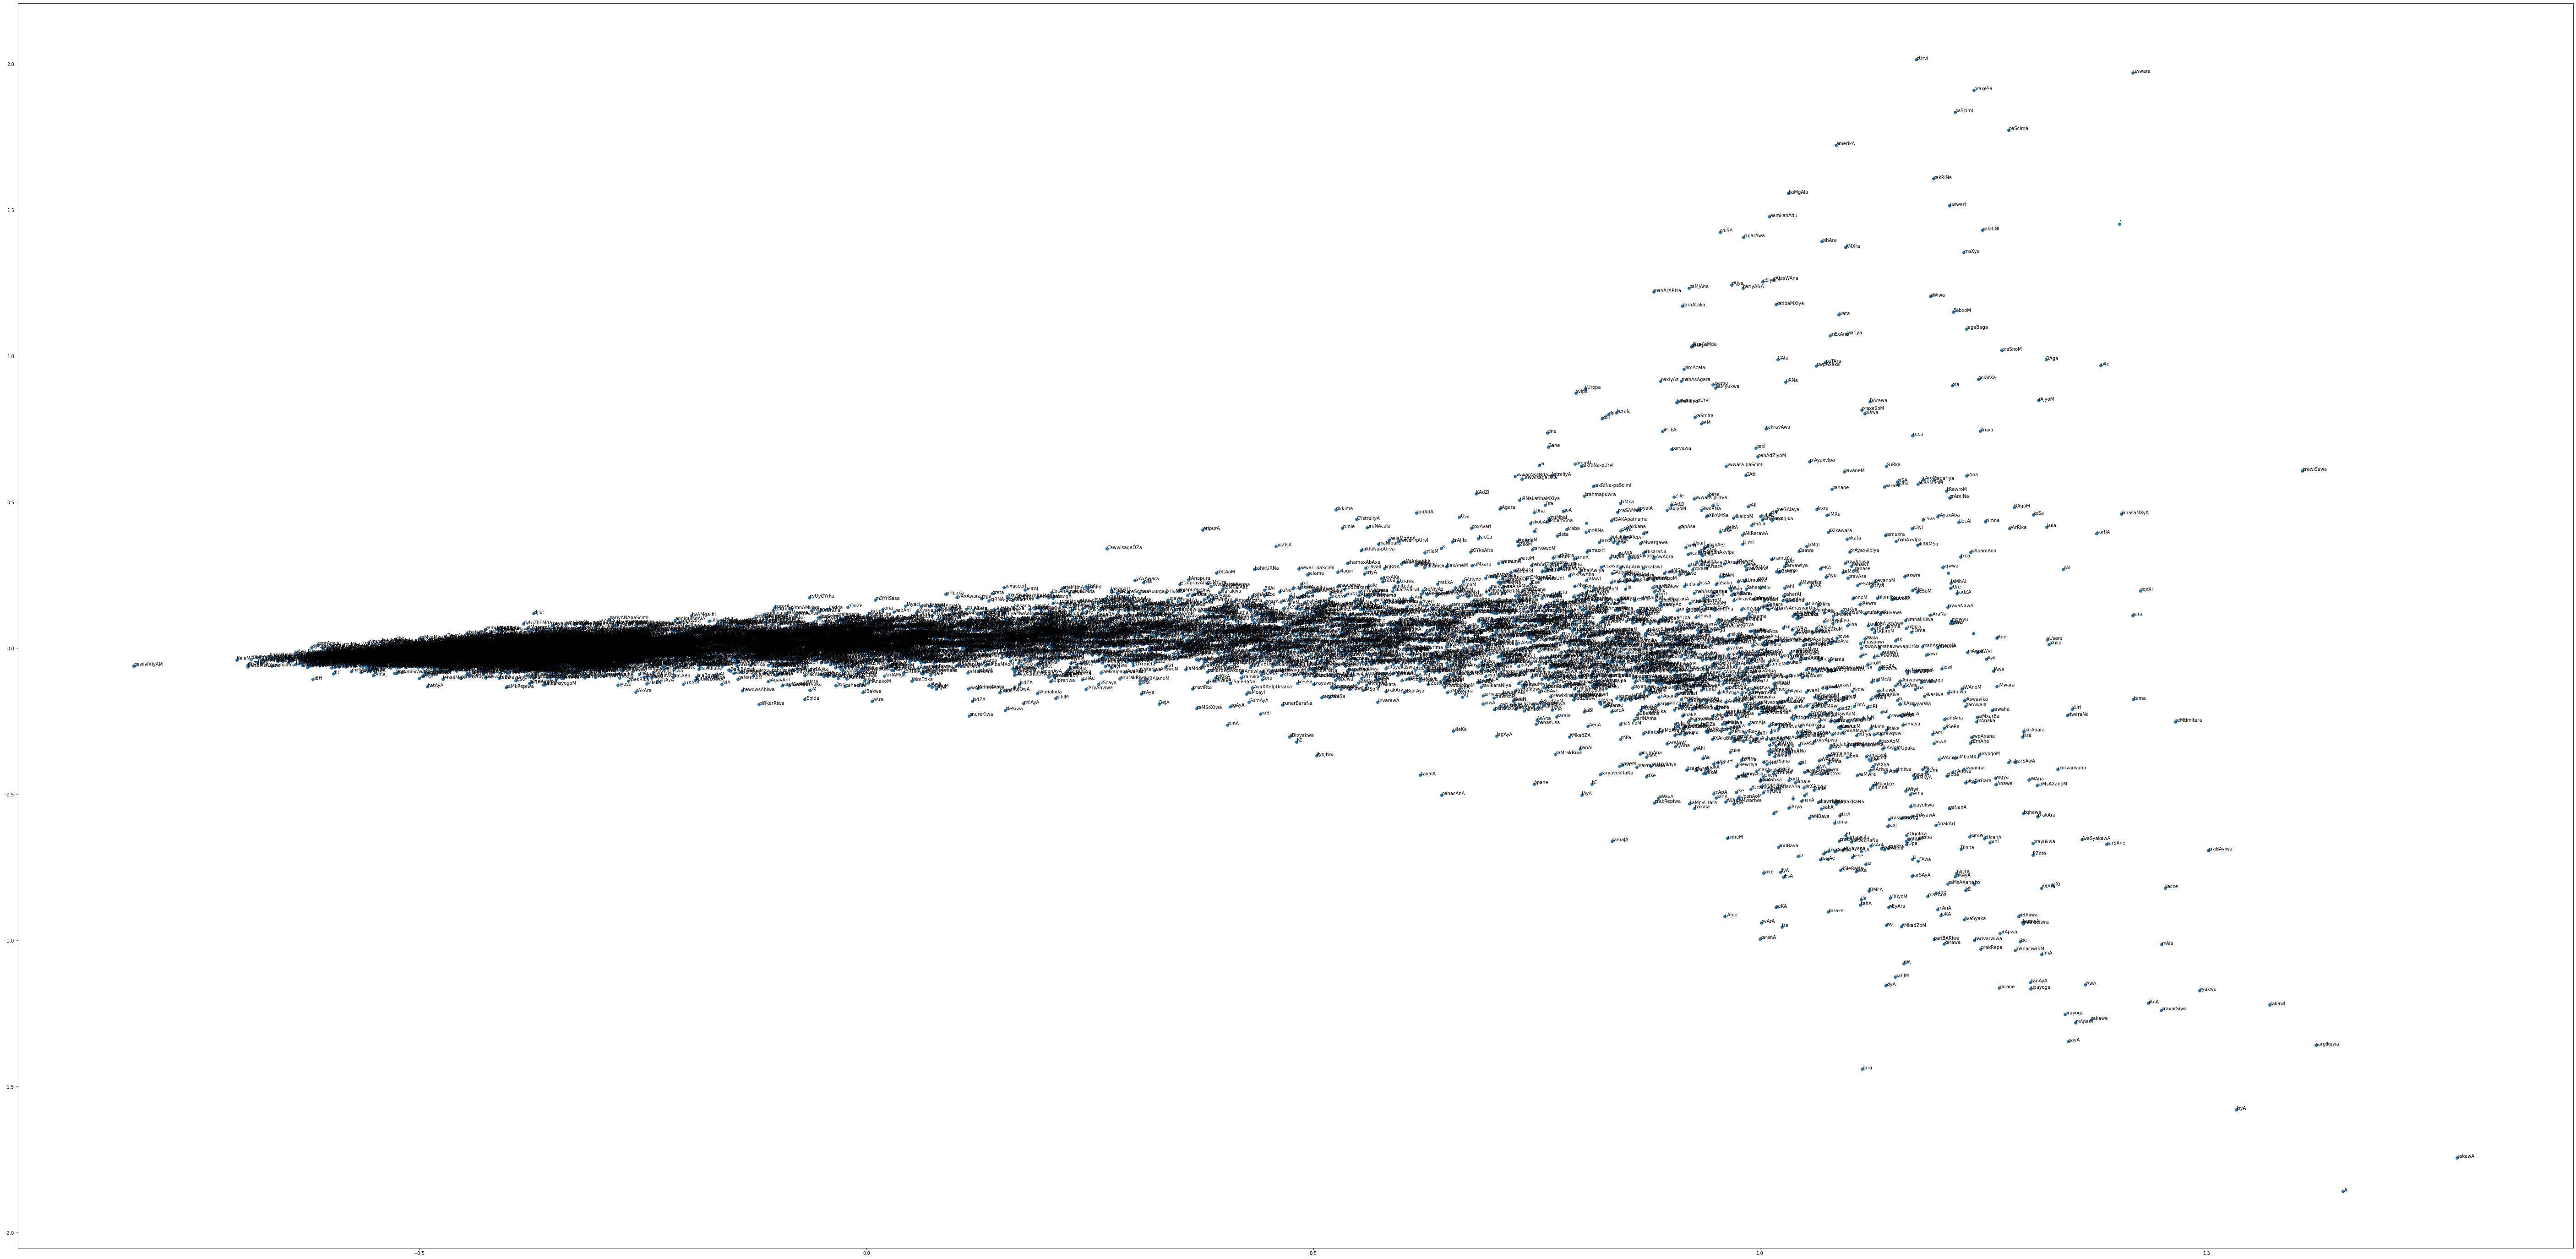

In [18]:

# train model
model = Word2Vec(sentences, min_count=1 ,vector_size=100,sg=1)
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=3)
result = pca.fit_transform(X)
plt_1 = pyplot.figure(figsize=(100, 50))
# create a scatter plot of the projection
con = WXC(order='utf2wx')
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
# print(result)
for i, word in enumerate(words):
	pyplot.annotate(con.convert(word), xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [45]:
newmodel.most_similar(positive=['doctor'])

[('physician', 0.7806021571159363),
 ('doctors', 0.747657299041748),
 ('gynecologist', 0.6947518587112427),
 ('surgeon', 0.6793398261070251),
 ('dentist', 0.6785441040992737),
 ('pediatrician', 0.664313793182373),
 ('pharmacist', 0.653485894203186),
 ('neurologist', 0.6517742872238159),
 ('cardiologist', 0.6352297067642212),
 ('nurse', 0.6319523453712463)]

In [20]:
print(model.wv['एक'])

[-0.1257422   0.25851864  0.1454627  -0.00692266  0.12996124 -0.3525334
  0.1691619   0.3131951  -0.49834457 -0.2684252  -0.15042974 -0.331354
  0.20976792  0.20894873  0.21717739 -0.19600813  0.20499343 -0.12584285
 -0.26613778 -0.8049135  -0.06673496  0.14424066 -0.01160609  0.2689103
 -0.03670004  0.19069946 -0.2023702   0.07379256 -0.3137009   0.119882
  0.17256363  0.26110145  0.21352851 -0.24251363 -0.06208053  0.3181549
  0.02076985 -0.14189808 -0.21645747 -0.24965048  0.09256971 -0.22331202
 -0.329734    0.12249061  0.04122571 -0.09622998 -0.21438383 -0.13245055
 -0.00400414  0.15746672  0.17226416 -0.14583434 -0.2605049  -0.11363619
 -0.13335486  0.11790416 -0.16364035 -0.23146492 -0.0575111  -0.01634996
  0.04641878  0.08427551  0.12923282 -0.01554614 -0.26432228  0.10455457
 -0.19605428  0.05111542 -0.2563116   0.15673117  0.2967034   0.5002219
  0.32329232 -0.06741399  0.294107    0.17482631  0.06478038 -0.14767677
 -0.08578415 -0.15099464 -0.12108387  0.02558064 -0.0857666

In [43]:
print(newmodel.doesnt_match([ 'woman' ,'boy','girl','lady']))


lady


In [32]:
# load the google word2vec model

from gensim.models import KeyedVectors
filename = '/home/turning/Documents/GitHub/CL_project/GoogleNews-vectors-negative300.bin'
newmodel = KeyedVectors.load_word2vec_format(filename, binary=True)

In [46]:
result = newmodel.most_similar(positive=[ 'doctor','woman'], negative=['man'], topn=1)
print(result)

[('gynecologist', 0.7093892097473145)]
